In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

In [2]:
metadata=pd.read_csv("metadata.csv")
sunroof_city=pd.read_csv("project-sunroof-city-02252018.csv")
sunroof_county=pd.read_csv("project-sunroof-county-02252018.csv")
sunroof_postalcode=pd.read_csv("project-sunroof-postal_code-02252018.csv")
sunroof_state=pd.read_csv("project-sunroof-state-02252018.csv")

In [3]:
metadata

,Field,Description
0,region_name,"Region name (census tract, zip code, city, cou..."
1,count_qualified,# of buildings in Google Maps that are suitabl...
2,percent_covered,% of buildings in Google Maps covered by Proje...
3,percent_qualified,% of buildings covered by Project Sunroof that...
4,yearly_sunlight_kwh_kw_threshold_avg,75% of the optimimum sunlight in the county co...
5,yearly_sunlight_kwh_total,total solar energy generation potential for al...
6,yearly_sunlight_kwh_f,total solar energy generation potential for fl...
7,yearly_sunlight_kwh_n,total solar energy generation potential for no...
8,yearly_sunlight_kwh_e,total solar energy generation potential for ea...
9,yearly_sunlight_kwh_s,total solar energy generation potential for so...


In [4]:
sunroof_city['state_name']

0             Arkansas
1            Louisiana
2       North Carolina
3              Indiana
4         Rhode Island
5                Texas
6             New York
7        Massachusetts
8           New Jersey
9        West Virginia
10               Texas
11            Illinois
12               Texas
13           Tennessee
14                Ohio
15               Texas
16           Wisconsin
17             Florida
18            Illinois
19          California
20             Indiana
21          Washington
22            Michigan
23           Louisiana
24           Minnesota
25            Arkansas
26            Missouri
27            Michigan
28        Pennsylvania
29            Illinois
             ...      
7900        California
7901      Pennsylvania
7902        California
7903           Florida
7904      Pennsylvania
7905          New York
7906         Wisconsin
7907          New York
7908           Arizona
7909          Illinois
7910            Hawaii
7911          Kentucky
7912       

In [14]:
state_qualified=sunroof_state[["state_name","percent_qualified","percent_covered"]]

In [15]:
state_qualified_cleaned=state_qualified.dropna()

In [16]:
state_qualified_1=state_qualified_cleaned.sort_values('percent_qualified',ascending=False)
state_top10=state_qualified_1.head(n=10)['state_name']
state_percent_qualified=state_qualified_1.head(n=10)['percent_qualified']
len(state_top10)

10

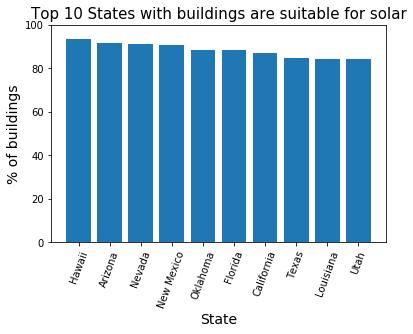

In [17]:
plt.bar(range(len(state_top10)), state_percent_qualified, tick_label=state_top10)
plt.xticks(rotation=70)
plt.ylim(0,100)
plt.title('Top 10 States with buildings are suitable for solar',fontsize=15)
plt.xlabel('State',fontsize=14)
plt.ylabel('% of buildings',fontsize=14)
plt.show()

In [9]:
sunroof_cal=sunroof_city[sunroof_city['state_name'] == 'California']

In [10]:
sunroof_cal.sort_values(['region_name'],ascending=True)

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count
6447,Acampo,California,38.241483,38.149618,-121.110576,-121.418479,38.202210,-121.220433,1227.400000,426,...,8.103408e+05,3.371186e+06,1.649035e+06,2.355773e+06,8.871234e+06,16178.506543,1.705757e+07,"[[0,88],[5,104],[10,64],[15,48],[20,36],[25,19...",4650.422573,13
6513,Adelanto,California,34.650980,34.507017,-117.384277,-117.644424,34.542087,-117.425691,1447.550000,5734,...,2.963809e+06,3.703843e+07,2.262935e+07,3.094269e+07,1.873515e+07,15854.722742,1.123094e+08,"[[0,745],[5,2454],[10,1602],[15,609],[20,181],...",30619.036114,12
6500,Agoura Hills,California,34.181139,34.081214,-118.706538,-118.832142,34.150608,-118.762603,1285.221967,6729,...,1.103380e+07,4.770091e+07,3.650439e+07,3.953468e+07,5.775215e+07,19416.851941,1.925259e+08,"[[0,559],[5,1689],[10,1843],[15,1225],[20,597]...",52488.541466,457
6546,Alameda,California,37.794489,37.719660,-122.224860,-122.325079,37.762103,-122.254871,1229.950000,16065,...,1.787365e+07,6.077814e+07,4.997127e+07,4.961848e+07,2.131905e+08,10014.910840,3.914320e+08,"[[0,4807],[5,6116],[10,2460],[15,884],[20,402]...",106306.223473,208
6545,Alamo,California,37.902786,37.809814,-121.937612,-122.066855,37.856852,-122.018646,1237.600000,5338,...,8.360806e+06,3.997040e+07,2.225215e+07,3.216661e+07,1.061962e+07,17009.517053,1.133696e+08,"[[0,711],[5,1328],[10,1250],[15,826],[20,561],...",30908.068122,999
6537,Albany,California,37.898732,37.882057,-122.282247,-122.313143,37.890270,-122.294463,1229.917212,3827,...,5.194798e+06,1.347665e+07,6.502694e+06,7.346062e+06,3.107056e+07,8798.430103,6.359076e+07,"[[0,1377],[5,1529],[10,478],[15,142],[20,66],[...",17336.814160,135
7230,Alhambra,California,34.110659,34.060304,-118.108450,-118.162850,34.083911,-118.136060,1285.304129,14961,...,1.953430e+07,6.841551e+07,2.243960e+07,4.221912e+07,1.297685e+08,9046.845300,2.823770e+08,"[[0,5752],[5,5371],[10,1676],[15,636],[20,321]...",76984.738935,171
7260,Aliso Viejo,California,33.608584,33.549268,-117.699559,-117.749592,33.579727,-117.729983,1260.550000,9844,...,9.660425e+06,5.138562e+07,3.639324e+07,3.860694e+07,5.074980e+07,9964.689246,1.867960e+08,"[[0,3041],[5,3836],[10,1430],[15,489],[20,216]...",50926.389911,340
6933,Alta Sierra,California,39.151697,39.105992,-121.031920,-121.074602,39.134364,-121.053208,1275.850000,607,...,3.950523e+04,3.493944e+06,1.470973e+06,1.308294e+06,3.906386e+05,8756.053162,6.703354e+06,"[[0,218],[5,224],[10,114],[15,29],[20,16],[25,...",1827.542291,25
6931,Altadena,California,34.221636,34.167773,-118.089749,-118.171442,34.188785,-118.135498,1285.329453,11218,...,8.840527e+06,4.507395e+07,2.498064e+07,2.982266e+07,3.782929e+07,9041.013794,1.465471e+08,"[[0,4162],[5,4238],[10,1623],[15,609],[20,247]...",39953.276954,274


In [11]:
cities = pd.read_csv('california_cities.csv')
cities.rename(columns={'city':'region_name'}, inplace=True)
cities
cal_cities=pd.merge(sunroof_cal, cities, on='region_name')

In [12]:
lat = cal_cities['latd'].values
lon = cal_cities['longd'].values
yearly_sunlight=cal_cities['yearly_sunlight_kwh_total'].values
area = cal_cities['area_total_km2'].values
population = cal_cities['population_total'].values

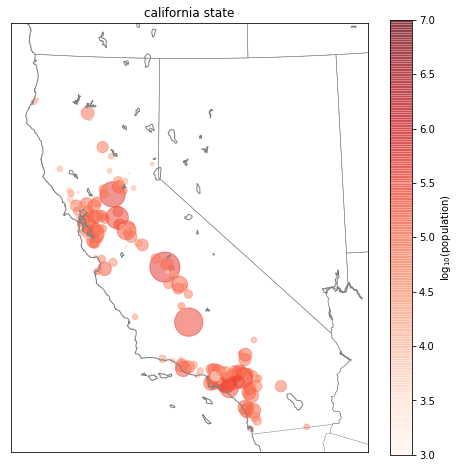

In [54]:
plt.figure(figsize=(8, 8))
m = Basemap(width=1000000,height=1200000,resolution='h',projection='lcc',lat_0=37.5,lon_0=-119)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
plt.title("California State")
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=yearly_sunlight/5000000,
          cmap='Reds', alpha=0.5)

plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)
plt.show()

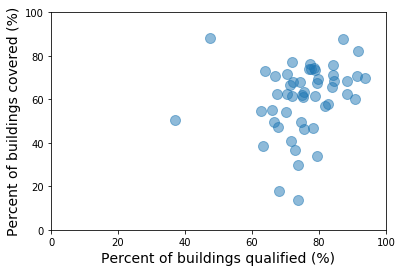

In [27]:
plt.scatter(state_qualified_cleaned['percent_qualified'],state_qualified_cleaned['percent_covered'],s=100,alpha=0.5)
plt.ylim(0,100)
plt.xlim(0,100)
plt.xlabel('Percent of buildings qualified (%)',fontsize=14)
plt.ylabel('Percent of buildings covered (%)',fontsize=14)
plt.show()

In [28]:
state_qualified_cleaned['covered/qualified']=state_qualified_cleaned['percent_covered']/state_qualified_cleaned['percent_qualified']

F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
state_qualified_cleaned

,state_name,percent_qualified,percent_covered,covered/qualified
0,Arizona,91.615986,82.343259,0.898787
1,Arkansas,75.680036,63.187435,0.834929
2,Alabama,78.455420,74.381423,0.948072
3,Alaska,37.150323,50.685736,1.364342
5,California,87.051870,87.964252,1.010481
6,Colorado,78.928536,73.601479,0.932508
7,Virginia,70.103327,54.114635,0.771927
8,Washington,77.225492,76.350930,0.988675
9,Wyoming,79.345981,34.140414,0.430273
10,West Virginia,73.890861,29.793814,0.403214
